In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [2]:
# Read CSV to Pandas DataFrame and display top 5 rows
df = pd.read_csv(r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\home-data-for-ml-course\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Column types
df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [4]:
# Convert all possible columns to numeric
a = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

# Get numeric columns minus 'Id' and 'SalePrice'
numeric_cols = a[a == 0].index.drop(['Id', 'SalePrice'])

# Get categorical columns minus 'Id' and 'SalePrice'
categorical_cols = df.columns.drop(numeric_cols).drop(['Id', 'SalePrice'])

# Get target column
target_col = 'SalePrice'

# Get target
target = df[target_col]

In [5]:
numeric_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [6]:
# Create copy of DataFrame for feature engineering
df_converted = df.copy()

### 1. Numerical Feature Engineering
#### 'MSSubClass':

In [7]:
df_converted['MSSubClass'].isnull().sum()

0

In [8]:
# Convert 'MSSubClass' to categorical
df_converted['MSSubClass'] = df_converted['MSSubClass'].map({
    20: '1-STORY 1946 & NEWER ALL STYLES',
    30:	'1-STORY 1945 & OLDER',
    40:	'1-STORY W/FINISHED ATTIC ALL AGES',
    45:	'1-1/2 STORY - UNFINISHED ALL AGES',
    50:	'1-1/2 STORY FINISHED ALL AGES',
    60:	'2-STORY 1946 & NEWER',
    70:	'2-STORY 1945 & OLDER',
    75:	'2-1/2 STORY ALL AGES',
    80:	'SPLIT OR MULTI-LEVEL',
    85:	'SPLIT FOYER',
    90:	'DUPLEX - ALL STYLES AND AGES',
    120:	'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150:	'1-1/2 STORY PUD - ALL AGES',
    160:	'2-STORY PUD - 1946 & NEWER',
    180:	'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190:	'2 FAMILY CONVERSION - ALL STYLES AND AGES'
    }
)

#### 'LotArea':

In [9]:
df_converted['LotArea'].isnull().sum()

0

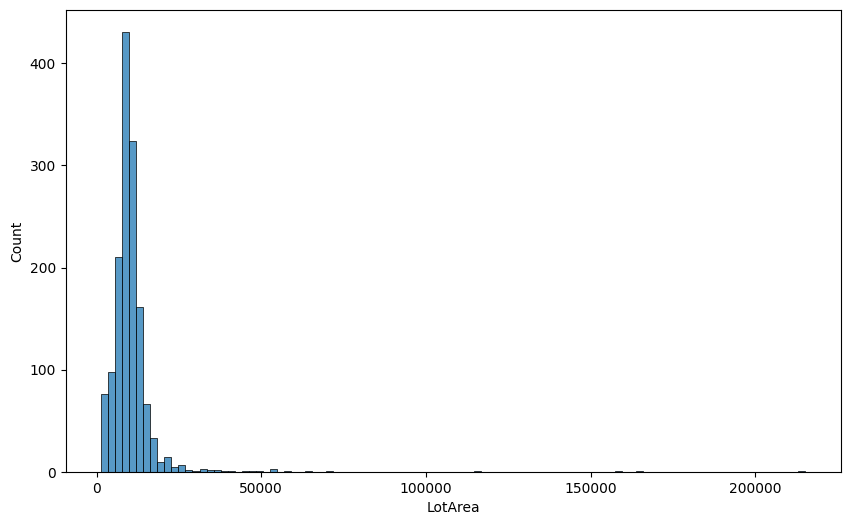

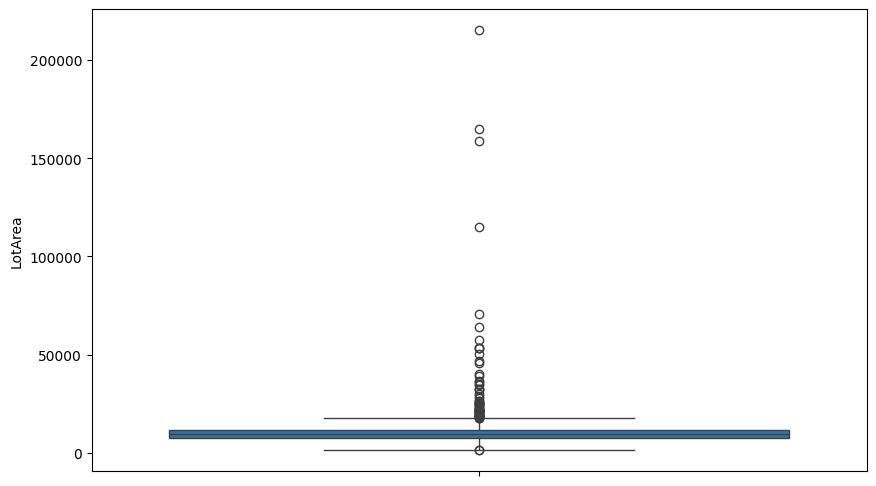

In [10]:
# Display of data in 'LotArea'
plt.figure(figsize=(10, 6))
sns.histplot(data=df['LotArea'], bins=100)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df['LotArea'])
plt.show()

Because the distribution of 'LotArea' is very skewed to the right and there are also a large number of outliers that are still important to the analysis, I will use quantile binning to transform this feature.

In [11]:
# Split 'LotArea' into quartiles
df_converted['LotArea'] = pd.qcut(df_converted['LotArea'], q=4, labels=['small', 'medium', 'large', 'XL'])

In [12]:
df_converted['LotArea'].value_counts()

LotArea
small     365
medium    365
large     365
XL        365
Name: count, dtype: int64

#### 'OverallQual':

In [13]:
df_converted['OverallQual'].isnull().sum()

0

In [14]:
df_converted['OverallQual'].value_counts().sort_index()

OverallQual
1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: count, dtype: int64

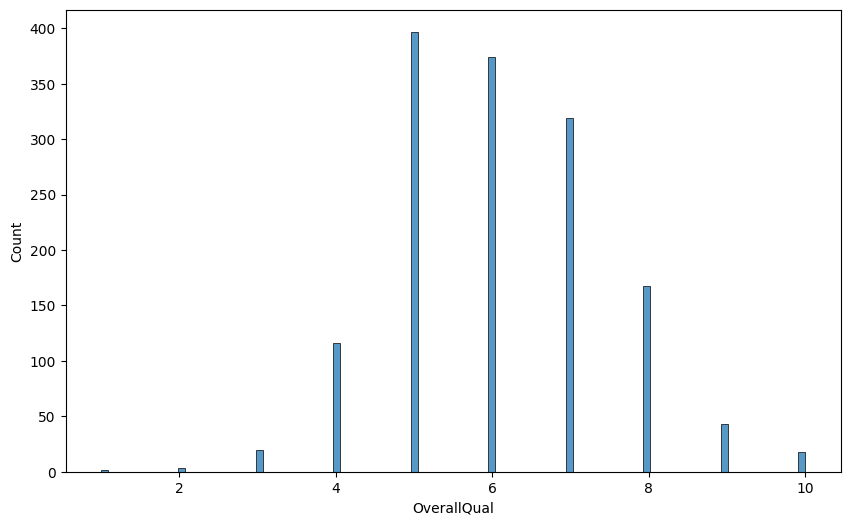

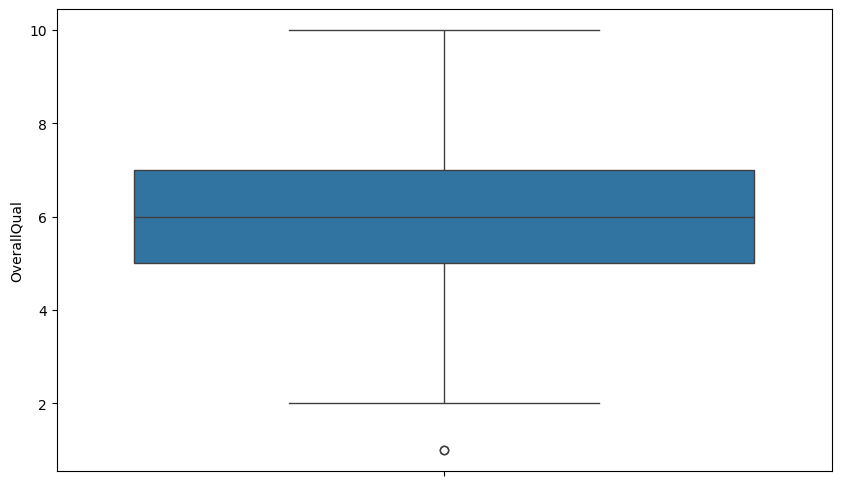

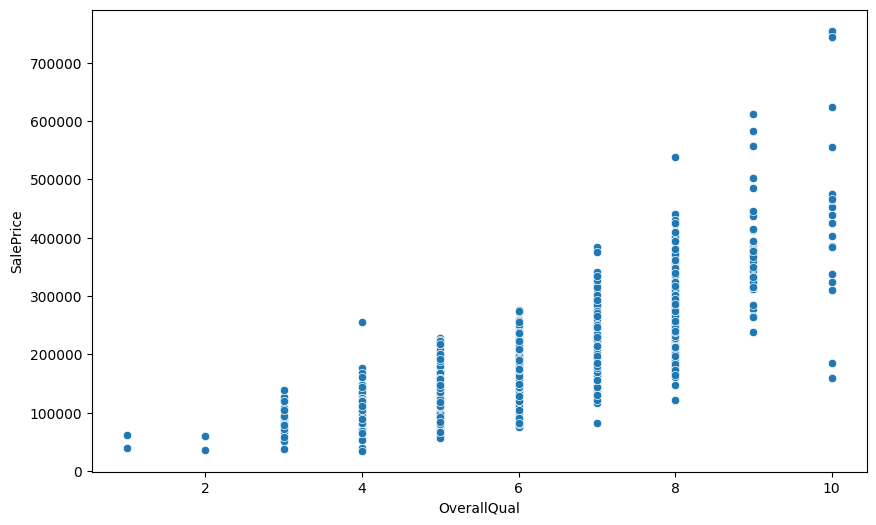

In [15]:
# Display of data in 'OverallQual'
plt.figure(figsize=(10, 6))
sns.histplot(data=df['OverallQual'], bins=100)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df['OverallQual'])
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='OverallQual', y=target)
plt.show()

In [16]:
df_converted['OverallQual'].value_counts().sort_index()

OverallQual
1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: count, dtype: int64

In [17]:
labels = ['low', 'average', 'high', 'very high']

df_converted['OverallQual'] = pd.qcut(df_converted['OverallQual'], q=4, labels=labels)

In [18]:
df_converted['OverallQual'].value_counts()

OverallQual
low          538
average      374
high         319
very high    229
Name: count, dtype: int64

<Figure size 1000x1000 with 0 Axes>

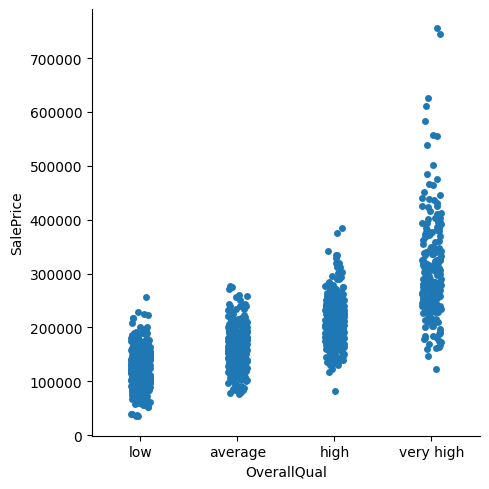

In [19]:
plt.figure(figsize=(10, 10))
sns.catplot(data=df_converted, x='OverallQual', y='SalePrice')
plt.show()

#### 'OverallCond':

In [20]:
df_converted['OverallCond'].isnull().sum()

0

In [21]:
df_converted['OverallCond'].value_counts().sort_index()

OverallCond
1      1
2      5
3     25
4     57
5    821
6    252
7    205
8     72
9     22
Name: count, dtype: int64

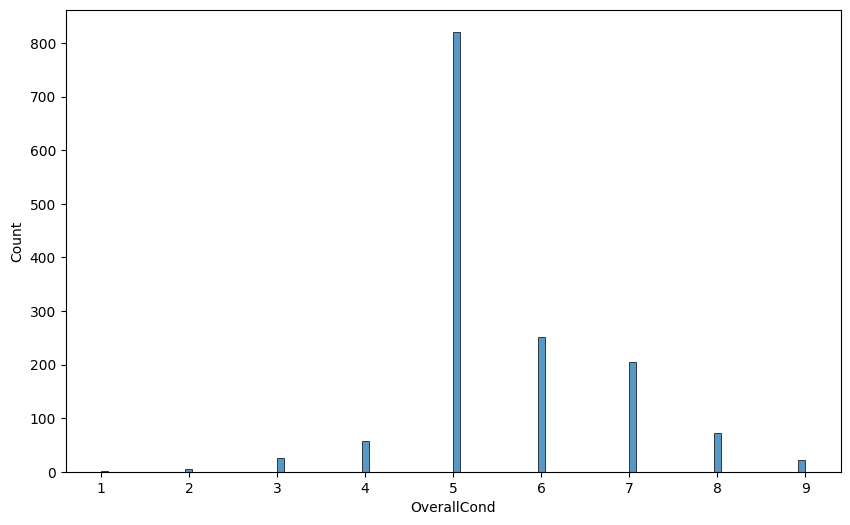

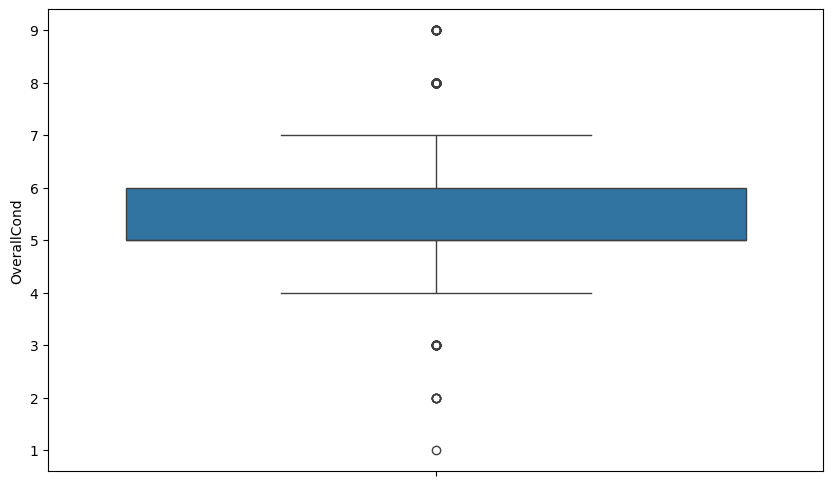

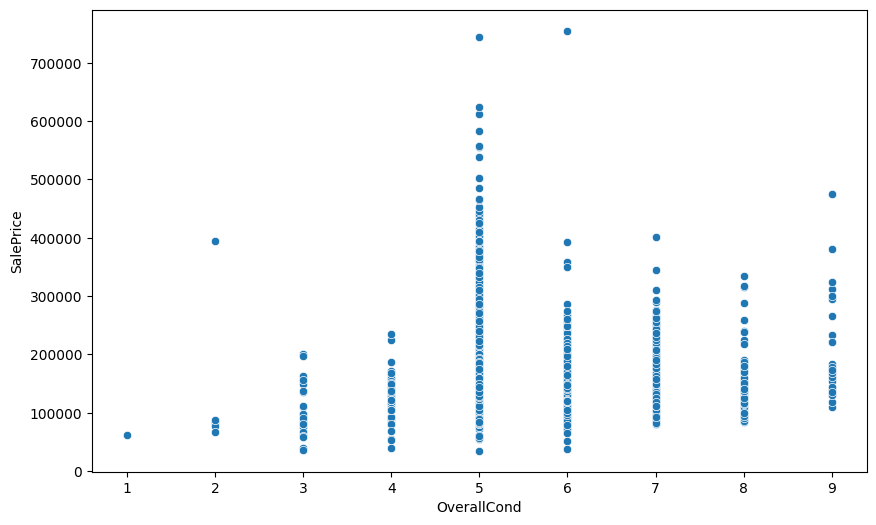

In [22]:
# Display of data in 'OverallCond'
plt.figure(figsize=(10, 6))
sns.histplot(data=df['OverallCond'], bins=100)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df['OverallCond'])
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='OverallCond', y=target)
plt.show()

Unlike 'OverallQual', in 'OverallCond' there is no consistent rise in 'SalePrice' as the condition improves i.e., as the condition rating gets higher --> <br>
I wil exclude this feature from the training data.

#### 'YearBuilt':

In [23]:
df_converted['YearBuilt'].isnull().sum()

0

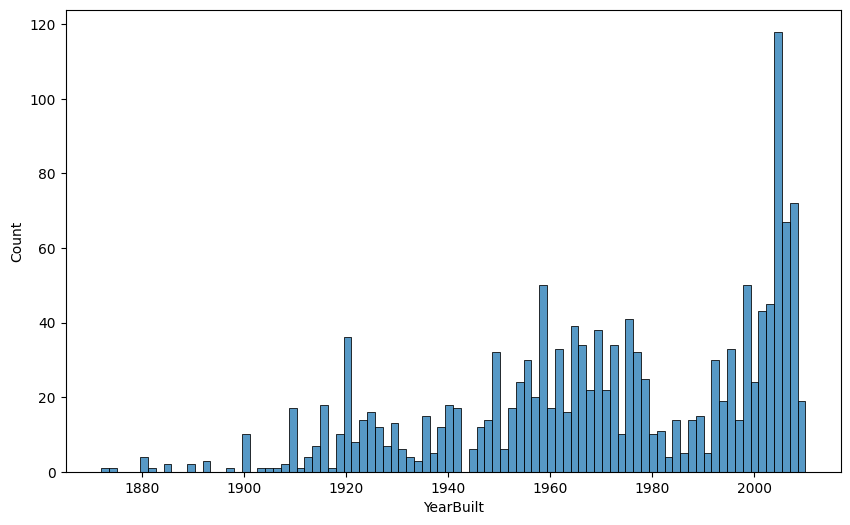

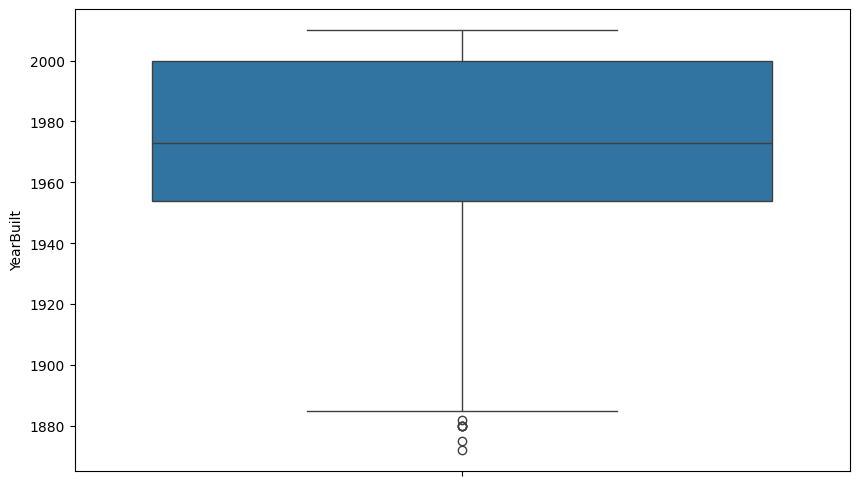

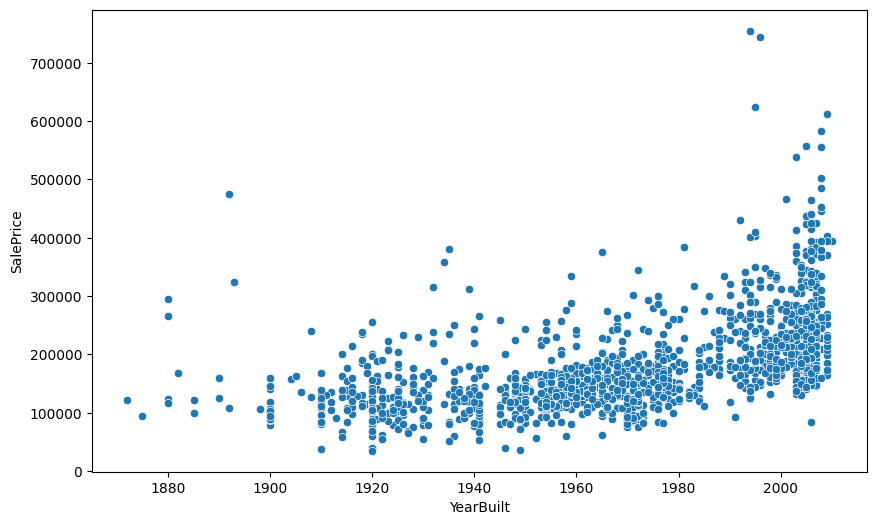

In [24]:
# Display of data in 'OverallQual'
plt.figure(figsize=(10, 6))
sns.histplot(data=df['YearBuilt'], bins=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df['YearBuilt'])
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearBuilt', y=target)
plt.show()

In [25]:
# Create bins and appropriate labels based on populations observed in histogram above
bins = [0, 1899, 1944, 2000, pd.Timestamp('now').year]
labels = ['Pre-1900', '1900-1950', '1951-2000', 'Post-2000']

In [26]:
# Convert all possible columns to numeric
a = df_converted.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

# Get numeric columns minus 'Id' and 'SalePrice'
numeric_cols = a[a == 0].index.drop(['Id', 'SalePrice'])

# Get categorical columns minus 'Id' and 'SalePrice'
categorical_cols = df_converted.columns.drop(numeric_cols).drop(['Id', 'SalePrice'])

# Get target column
target_col = 'SalePrice'

In [27]:
numeric_cols

Index(['OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [30]:
df_converted[numeric_cols].isnull().sum()

OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [34]:
numeric_data = df_converted[numeric_cols]


X_train, X_test, y_train, y_test = train_test_split(numeric_data, df_converted[target_col], test_size=0.3, random_state=42)

num_model = RandomForestRegressor(random_state=42, max_depth=6)

num_model.fit(X=X_train, y=y_train)

RandomForestRegressor(max_depth=6, random_state=42)

In [ ]:
categorical_data = df_converted[numeric_cols]


X_train, X_test, y_train, y_test = train_test_split(numeric_data, df_converted[target_col], test_size=0.3, random_state=42)

num_model = RandomForestRegressor(random_state=42, max_depth=6)

num_model.fit(X=X_train, y=y_train)